In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Fewer bins for brighter samples?

In [2]:
p0_21p0 = np.array((1.33738,13.98811,0.55950,11.95797,12.82356,0.,0.))
Npert = 200

In [30]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck',version_name='halotools_v0p4',halo_finder='rockstar',redshift=0)

In [31]:
from HOD_models_fix import decorated_hod_model

In [32]:
model = decorated_hod_model()

In [33]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [41]:
seed = 1165274

In [42]:
ngal_abn = []
for alpha in np.linspace(1.2,1.4,21):
    p = p0_21p0*1.
    p[0] = alpha
    model.param_dict.update(dict(zip(param_names, p)))    ##update model.param_dict with pairs (param_names:params)
    
    try:
        model.mock.populate(seed=seed)
    except:
        model.populate_mock(halocat, seed=seed)
    ngal_abn.append(len(model.mock.galaxy_table))

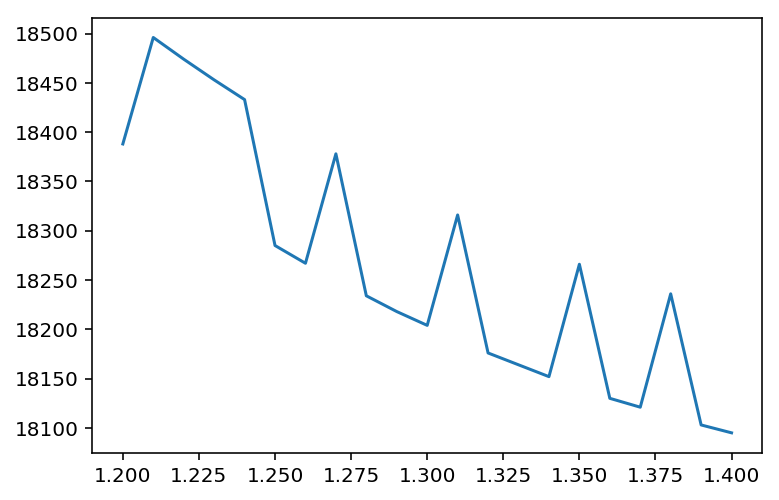

In [43]:
plt.plot(np.linspace(1.2,1.4,21),ngal_abn)

In [44]:
model.mock.galaxy_table

halo_upid,halo_num_centrals,halo_hostid,halo_nfw_conc,halo_y,halo_x,halo_id,halo_vx,halo_vy,halo_vz,halo_num_satellites,conc_NFWmodel,halo_rvir,halo_z,halo_mvir,gal_type,vx,host_centric_distance,vy,y,x,vz,z
int64,int32,int64,float32,float32,float32,int64,float32,float32,float32,int32,float32,float32,float32,float32,object,float32,float64,float32,float32,float32,float32,float32
-1,1,2811042639,8.62937,43.1408,36.1798,2811042639,16.1,8.51,-78.88,3,8.62937,1.19045,17.9634,2.008e+14,centrals,16.1,0.0,8.51,43.1408,36.1798,-78.88,17.9634
-1,1,2811055606,6.17233,49.5442,45.3664,2811055606,2.46,264.77,-128.08,5,6.17233,1.14685,40.0159,1.796e+14,centrals,2.46,0.0,264.77,49.5442,45.3664,-128.08,40.0159
-1,1,2809250167,8.62862,13.8826,22.0232,2809250167,18.49,124.89,-35.19,0,8.62862,1.02934,9.80153,1.298e+14,centrals,18.49,0.0,124.89,13.8826,22.0232,-35.19,9.80153
-1,1,2809483946,7.20131,36.6788,12.2979,2809483946,-281.37,-115.39,-391.28,1,7.20131,0.952978,34.1809,1.03e+14,centrals,-281.37,0.0,-115.39,36.6788,12.2979,-391.28,34.1809
-1,1,2809272603,6.69101,26.1288,10.6604,2809272603,-43.87,292.95,-171.47,1,6.69101,0.941893,22.5009,9.947e+13,centrals,-43.87,0.0,292.95,26.1288,10.6604,-171.47,22.5009
-1,1,2809261554,9.26116,29.5494,1.93592,2809261554,281.14,229.38,224.59,3,9.26116,0.927672,18.1172,9.503e+13,centrals,281.14,0.0,229.38,29.5494,1.93592,224.59,18.1172
-1,1,2809285813,5.74128,24.6632,14.8268,2809285813,-85.39,208.72,-470.92,2,5.74128,0.905182,38.8625,8.829e+13,centrals,-85.39,0.0,208.72,24.6632,14.8268,-470.92,38.8625
-1,1,2809273410,9.21493,25.6495,15.1038,2809273410,-365.37,199.12,-194.93,1,9.21493,0.897055,23.6818,8.593e+13,centrals,-365.37,0.0,199.12,25.6495,15.1038,-194.93,23.6818
-1,1,2809284998,7.29123,33.3391,10.4937,2809284998,-44.45,275.28,-407.85,0,7.29123,0.886089,33.392,8.282e+13,centrals,-44.45,0.0,275.28,33.3391,10.4937,-407.85,33.392


In [37]:
seed = 123456

In [38]:
ngal = []
for alpha in np.linspace(1.2,1.4,21):
    p = p0_21p0*1.
    p[0] = alpha
    model.param_dict.update(dict(zip(param_names, p)))    ##update model.param_dict with pairs (param_names:params)
    
    try:
        model.mock.populate(seed=seed)
    except:
        model.populate_mock(halocat, seed=seed)
    ngal.append(len(model.mock.galaxy_table))

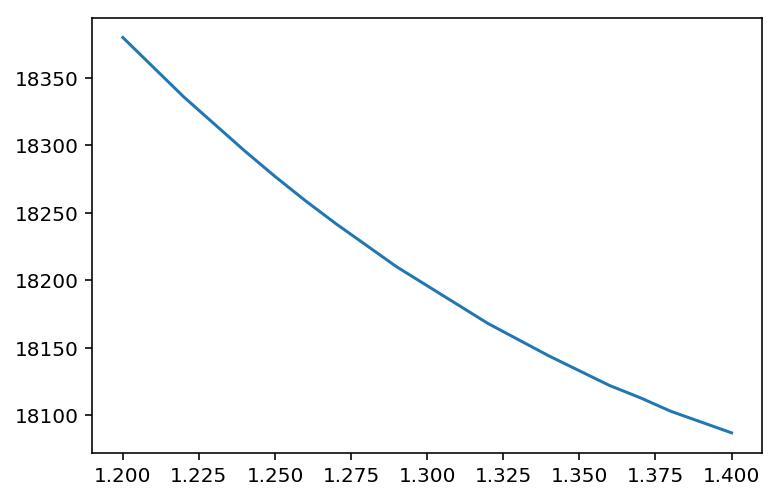

In [39]:
plt.plot(np.linspace(1.2,1.4,21),ngal)

In [3]:
run_1 = np.load('Run_050218/bolp_21p0_um_0_b_244624.npz')
run_2 = np.load('Run_050218/bolp_21p0_um_0_b_4507626.npz')
run_3 = np.load('Run_050218/bolp_21p0_um_0_b_7683956.npz')
run_4 = np.load('Run_050218/bolp_21p0_um_0_b_9199927.npz')
run_5 = np.load('Run_050218/bolp_21p0_um_0_b_9371874.npz')

In [5]:
run_1.files

['i', 'func_all', 'param']

In [7]:
def plot_fp(param,func,ip,jf,krun,folder):
    plt.figure()
    plt.plot(param,func,'b.')
    plt.axvline(p0_21p0[ip],linestyle=':',color='grey')
    plt.savefig(folder+'/run{}_p{}f{}'.format(krun,ip,jf))
    plt.close()

In [11]:
for i in range(7):
    for j in range(100):
        plot_fp(run_1['param'][i*Npert:i*Npert+Npert,i],run_1['func_all'][i*Npert:i*Npert+Npert,j],i,j,1,\
               'Run_050218/bolp_21p0_um_0_fewer_bins')

In [12]:
for i in range(7):
    for j in range(100):
        plot_fp(run_2['param'][i*Npert:i*Npert+Npert,i],run_2['func_all'][i*Npert:i*Npert+Npert,j],i,j,2,\
               'Run_050218/bolp_21p0_um_0_fewer_bins')

In [13]:
for i in range(7):
    for j in range(100):
        plot_fp(run_3['param'][i*Npert:i*Npert+Npert,i],run_3['func_all'][i*Npert:i*Npert+Npert,j],i,j,3,\
               'Run_050218/bolp_21p0_um_0_fewer_bins')

In [14]:
for i in range(7):
    for j in range(100):
        plot_fp(run_4['param'][i*Npert:i*Npert+Npert,i],run_4['func_all'][i*Npert:i*Npert+Npert,j],i,j,4,\
               'Run_050218/bolp_21p0_um_0_fewer_bins')

In [15]:
for i in range(7):
    for j in range(100):
        plot_fp(run_5['param'][i*Npert:i*Npert+Npert,i],run_5['func_all'][i*Npert:i*Npert+Npert,j],i,j,5,\
               'Run_050218/bolp_21p0_um_0_fewer_bins')

In [18]:
polydfdp_1 = np.zeros((7,100))
polydfdp_2 = np.zeros((7,100))
polydfdp_3 = np.zeros((7,100))
polydfdp_4 = np.zeros((7,100))
polydfdp_5 = np.zeros((7,100))

In [19]:
for i in range(7):
    p0 = p0_21p0[i]
    for j in range(100):
        a,b,c,d = np.polyfit(run_1['param'][i*Npert:i*Npert+Npert,i],\
                                 run_1['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_1[i,j] = a*p0**3+b*p0**2+c*p0+d
        a,b,c,d = np.polyfit(run_2['param'][i*Npert:i*Npert+Npert,i],\
                                 run_2['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_2[i,j] = a*p0**3+b*p0**2+c*p0+d
        a,b,c,d = np.polyfit(run_3['param'][i*Npert:i*Npert+Npert,i],\
                                 run_3['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_3[i,j] = a*p0**3+b*p0**2+c*p0+d
        a,b,c,d = np.polyfit(run_4['param'][i*Npert:i*Npert+Npert,i],\
                                 run_4['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_4[i,j] = a*p0**3+b*p0**2+c*p0+d
        a,b,c,d = np.polyfit(run_5['param'][i*Npert:i*Npert+Npert,i],\
                                 run_5['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_5[i,j] = a*p0**3+b*p0**2+c*p0+d

In [20]:
polydfdp_mean = (polydfdp_1+polydfdp_2+polydfdp_3+polydfdp_4+polydfdp_5)/5.

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


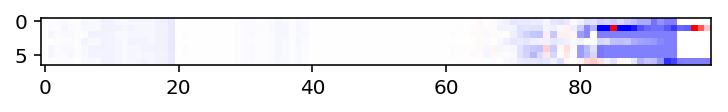

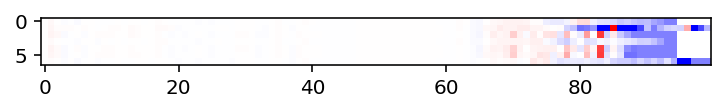

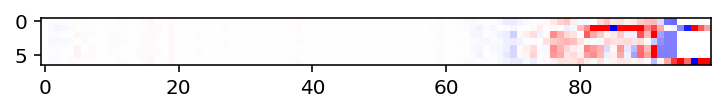

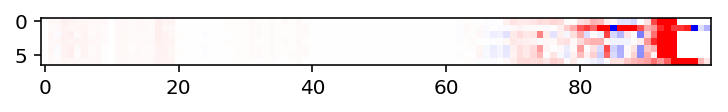

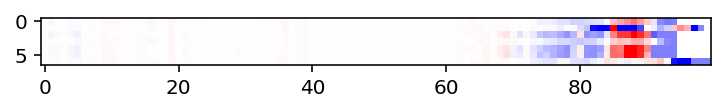

In [26]:
plt.figure()
plt.imshow((polydfdp_1/polydfdp_mean)[:,:],vmin=-1,vmax=3,cmap='bwr')
plt.figure()
plt.imshow((polydfdp_2/polydfdp_mean)[:,:],vmin=-1,vmax=3,cmap='bwr')
plt.figure()
plt.imshow((polydfdp_3/polydfdp_mean)[:,:],vmin=-1,vmax=3,cmap='bwr')
plt.figure()
plt.imshow((polydfdp_4/polydfdp_mean)[:,:],vmin=-1,vmax=3,cmap='bwr')
plt.figure()
plt.imshow((polydfdp_5/polydfdp_mean)[:,:],vmin=-1,vmax=3,cmap='bwr')